# House Value Prediction Experimentation

### 0.0 Libraries Import

In [89]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1.0 Data Ingestion

In [90]:
FILE_NAME = "Real_estate_valuation_dataset.xlsx"
DATA_FOLDER = "data"

main_path = os.getcwd()
file_path = os.path.join(os.path.join(main_path, DATA_FOLDER), FILE_NAME)

In [91]:
%%time

valuation_data = pd.read_excel(file_path)

CPU times: user 56.2 ms, sys: 7.36 ms, total: 63.5 ms
Wall time: 67 ms


### 2.0 Data Inspection

In [92]:
valuation_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


#### Rename Columns

In [93]:
valuation_data = valuation_data.rename(columns={"X1 transaction date":"transact_date",
                  "X2 house age":"house_age",
                  "X3 distance to the nearest MRT station":"station_dist",
                  "X4 number of convenience stores":"stores_num",
                  "X5 latitude":"latitude",
                  "X6 longitude":"longitude",
                  "Y house price of unit area":"house_price"})
valuation_data.head()

,No,transact_date,house_age,station_dist,stores_num,latitude,longitude,house_price
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [94]:
house_data.shape

(414, 7)

In [95]:
house_data = valuation_data.drop(["No"], axis=1)
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transact_date  414 non-null    float64
 1   house_age      414 non-null    float64
 2   station_dist   414 non-null    float64
 3   stores_num     414 non-null    int64  
 4   latitude       414 non-null    float64
 5   longitude      414 non-null    float64
 6   house_price    414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


### 3.0 Exploratory Data Analysis

In [96]:
house_data.describe()

,transact_date,house_age,station_dist,stores_num,latitude,longitude,house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [97]:
house_data["transact_date"].value_counts() # Twelve months of data available between 2012 and 2013.

2013.416667    58
2013.500000    47
2013.083333    46
2012.916667    38
2013.250000    32
2012.833333    31
2012.666667    30
2013.333333    29
2013.000000    28
2012.750000    27
2013.166667    25
2013.583333    23
Name: transact_date, dtype: int64

#### Number of houses sold per month

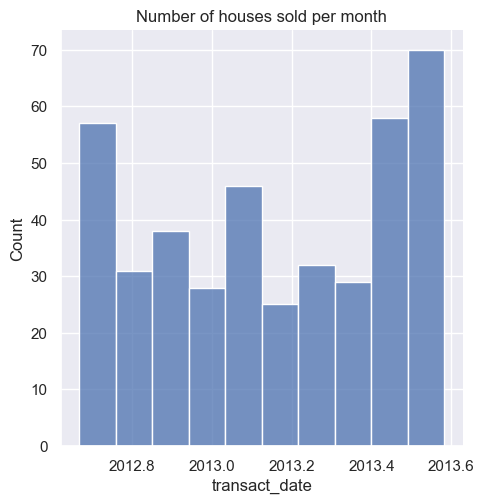

In [98]:
# Histogram showing the number of houses sold per month 

sns.displot(house_data, x="transact_date")
plt.title("Number of houses sold per month")
plt.show()

**The Histogram suggests that there are more sales in the summer months**

#### Age of houses sold

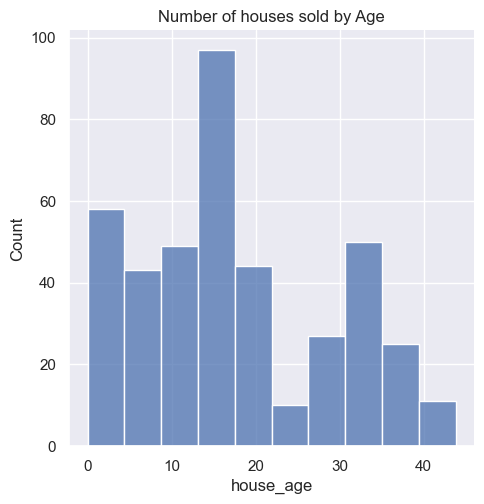

In [99]:
# Histogram showing the distribution age of houses sold

sns.displot(house_data, x="house_age")
plt.title("Number of houses sold by Age")
plt.show()

**The histogram suggest that more houses are sold at about 15 years.** This can be because of numerous reasons we dont have enough data to explore. People might traditionally what to change houses instead of spending on home upgrade, Kids may be grown and off to college etc...   

It is also interesting to see the guassian distribution if the houses sold between 20 and 40+ years.

#### Distance to the nearest MRT station

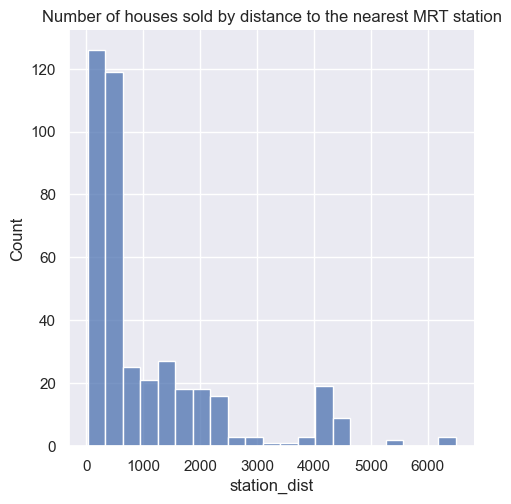

In [100]:
# Histogram showing the number of houses sold by distance to the nearest MRT station

sns.displot(house_data, x="station_dist")
plt.title("Number of houses sold by distance to the nearest MRT station")
plt.show()

**Higher number of houses sold are close to a MRT station.** One should compare this with the house density in the region considered to be able to resonably conclude that the distance to the nearest MRT station affects the sale of a house.

#### Number of convenience stores

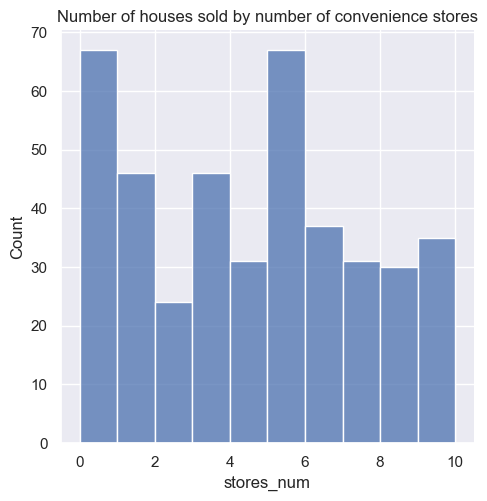

In [101]:
#

sns.displot(house_data, x="stores_num")
plt.title("Number of houses sold by number of convenience stores")
plt.show()

**The distribution suggests that the number of convenience stores might not have any significant influence or relationship to the number of houses sold**

#### House price of unit area

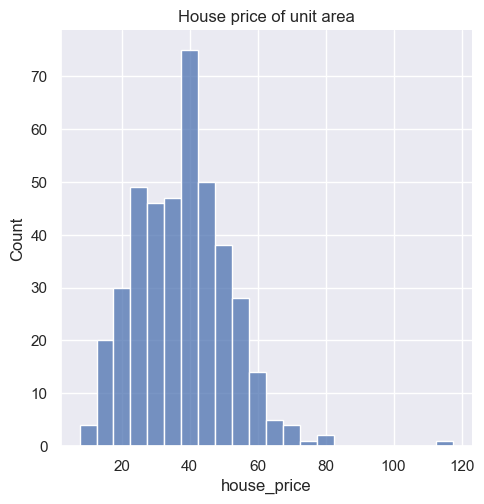

In [102]:
sns.displot(house_data, x="house_price")
plt.title("House price of unit area")
plt.show()



- How to check how relevant latitude and longitude are...
- geopandas for lat and long

-  It might be interesting to order the data by date and see trends.

### Data Visualizations

Relationship between features in the dataset

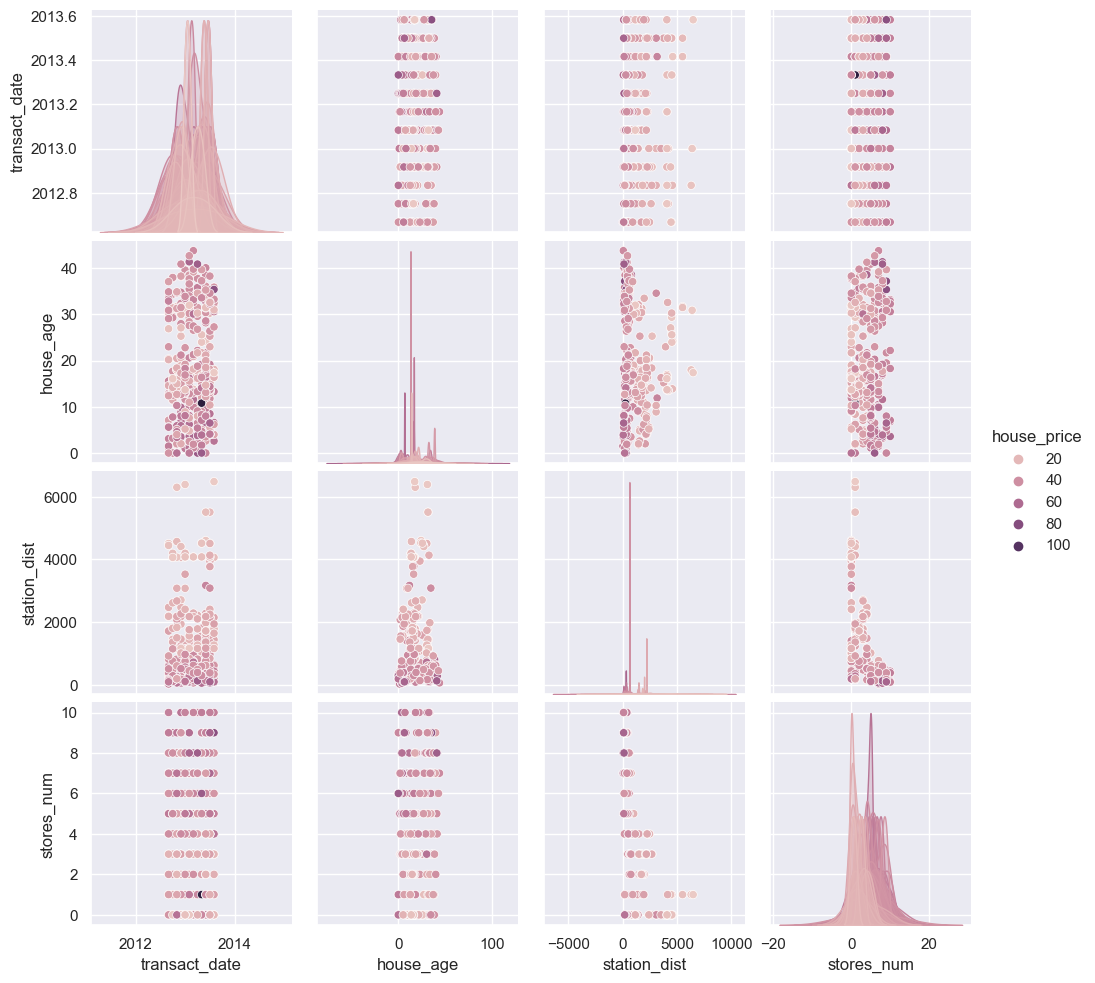

In [104]:
vis_data = house_data.drop(["latitude", "longitude"], axis=1)
sns.pairplot(data = vis_data, hue="house_price")
plt.show()

### Insights

- Compared to other years, houses about 25 years old are not sold
- Houses with lower distance to the station sold more in number and at a higher price irrespective of the age (except for houses about 25 years old)
- Houses with more store numbers sold higher in prices but not necessarily in number irrespective of the age of the house.
- Irrespective of the transaction date and house age, houses close to the MRT station sold more in number and at higher prices. Of this houses, those with high number of stores sold at higher prices.
- Generally, 
    - with more stores, lower distance to the MRT station, the house prices are higher 
    - The house age and transaction date does not necessarily affect the price.
    
- Some of the plots are shown singly for clarity. 

`A) Relationship between transact_date, house_age and house_price`

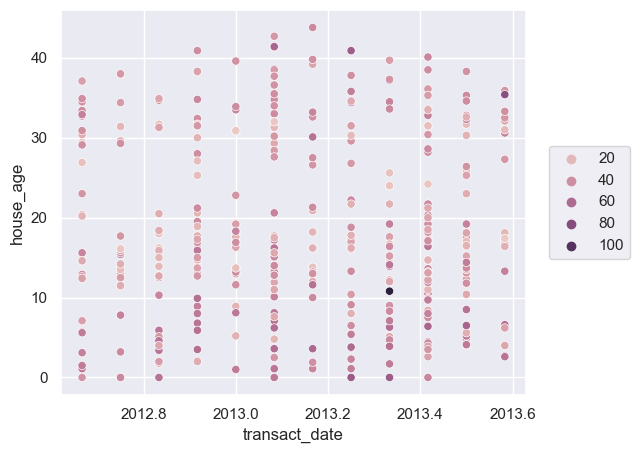

In [105]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=house_data, x="transact_date", y="house_age",
                hue="house_price")
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)
plt.show()

`Relationship between transact_date, house_price and house_age`

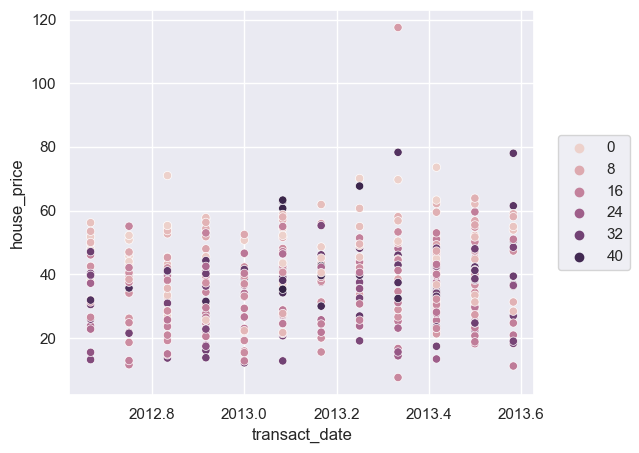

In [106]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=house_data, x="transact_date", y="house_price",
                hue="house_age")
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)
plt.show()

`Relationship between house_age, station_dist and house_price`

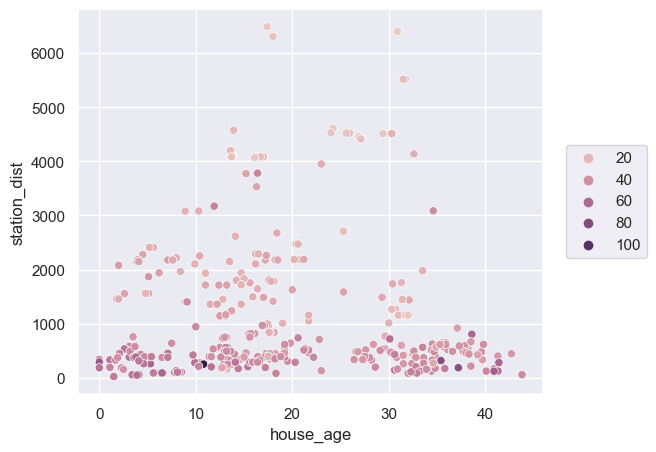

In [107]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=house_data, x="house_age", y="station_dist",
                hue="house_price")
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)
plt.show()

`Relationship between house_age, store_num and house_price`

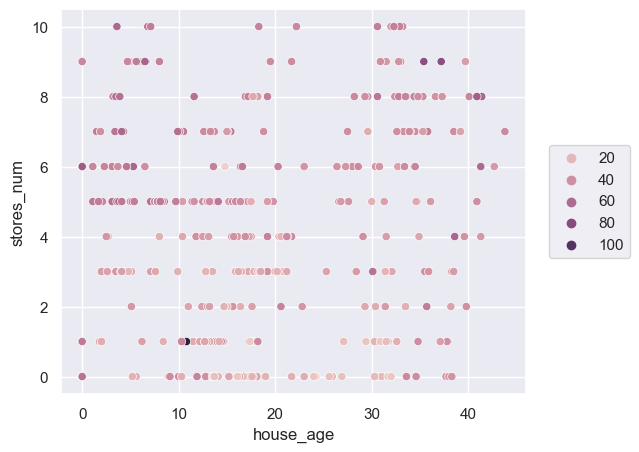

In [108]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=house_data, x="house_age", y="stores_num",
                hue="house_price")
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)
plt.show()

`Relationship between house_age, house_price and store_num`

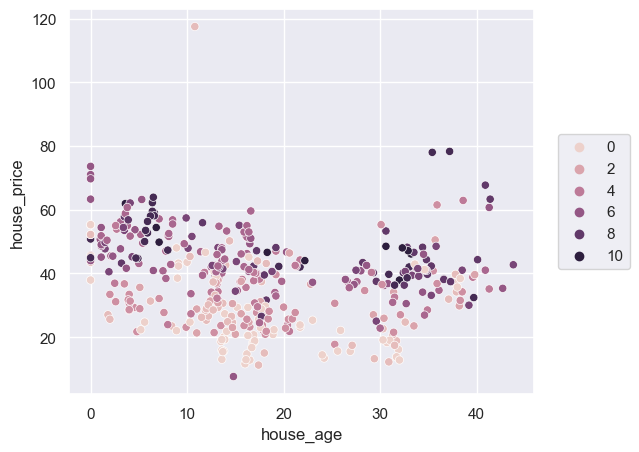

In [109]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=house_data, x="house_age", y="house_price",
                hue="stores_num")
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)
plt.show()

`Relationship between house_age, house_price and station_dist`

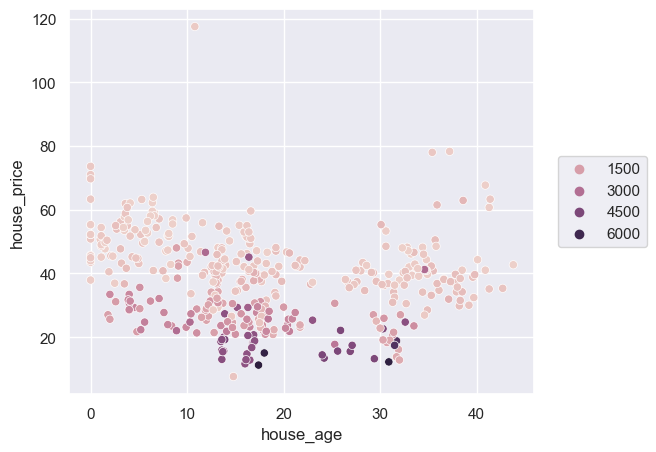

In [110]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=house_data, x="house_age", y="house_price",
                hue="station_dist")
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)
plt.show()

`Relationship between station_dist, stores_num and house_price`

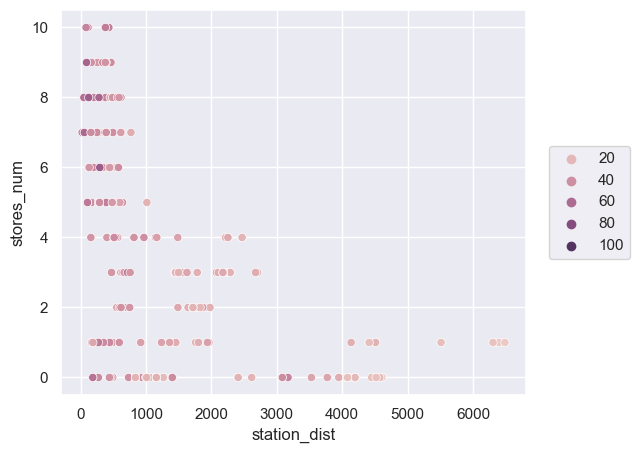

In [111]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=house_data, x="station_dist", y="stores_num",
                hue="house_price")
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)
plt.show()

`Relationship between latitude, longitude and house_price`

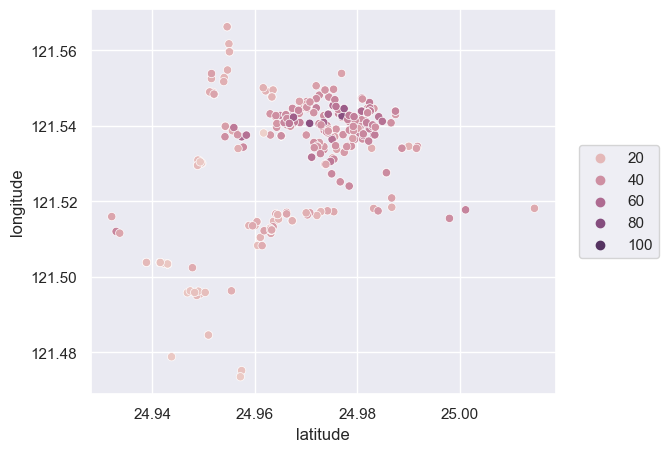

In [112]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=house_data, x="latitude", y="longitude",
                hue="house_price")
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)
plt.show()

`Relationship between latitude, longitude and transact_date`

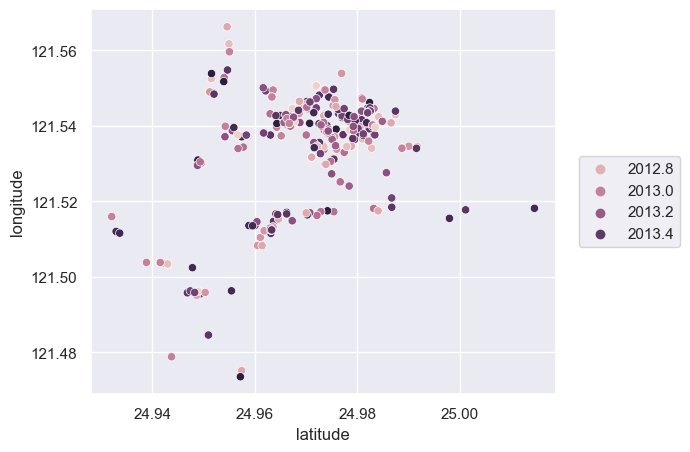

In [113]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=house_data, x="latitude", y="longitude",
                hue="transact_date")
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)
plt.show()

In [71]:
# for val in house_data["transact_date"][0:5]:
#     intpart, decimalpart = int(val), val-int(val)
#     print(intpart, decimalpart)d

In [ ]:
house_age vs station_dist hue house_price

house_age vs store_num hue house_price

house_age vs house_price hue stores_num

house_age vs house_price hue station_dist

station_dist vs stores_num hue price

In [8]:
features = house_data.iloc[:,:-1]
features.head()
features.shape

(414, 7)

In [7]:
target = house_data.iloc[:,-1]
target.head()
target.shape

(414,)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


featurestrain, featurestest, targettrain, targettest = train_test_split(features, target, random_state=1)

model = LinearRegression(fit_intercept=False)
model.fit(featurestrain,targettrain)
predicted = model.predict(featurestest)


In [13]:
# predicted

In [84]:
# pd.DataFrame({'test':targettest,'predicted':predicted},columns = ['test','predicted'])

In [15]:
# from sklearn.ensemble import GradientBoostingRegressor

In [55]:
# gbr = GradientBoostingRegressor()
# gbr_model = gbr.fit(featurestrain, targettrain)
# gbr_model

In [56]:
# print(gbr_model.get_params())

In [31]:
# gbr_params = {"learning_rate": [0.001,0.1,0.01],
#              "max_depth": [3,5,8],
#              "n_estimators": [100,200],
#              "subsample": [1,0.5,0.8],
#              "loss": ["ls","lad","quantile"]}

In [54]:
#gbr_cv=GridSearchCV(gbr_model,gbr_params,cv=10,n_jobs=-1,verbose=2).fit(featurestrain, targettrain)

In [53]:
#gbr_cv.best_params_

In [42]:
plt.scatter(x=df['Longitude'], y=df['Latitude'])
plt.show()

<Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>

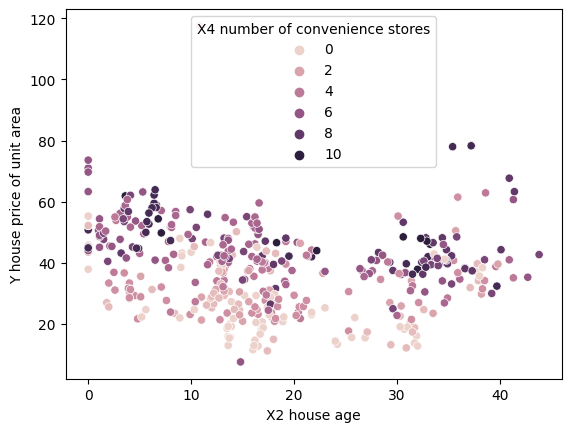

In [6]:
sns.scatterplot(data=house_data, x="X2 house age", y="Y house price of unit area",
                hue="X4 number of convenience stores")

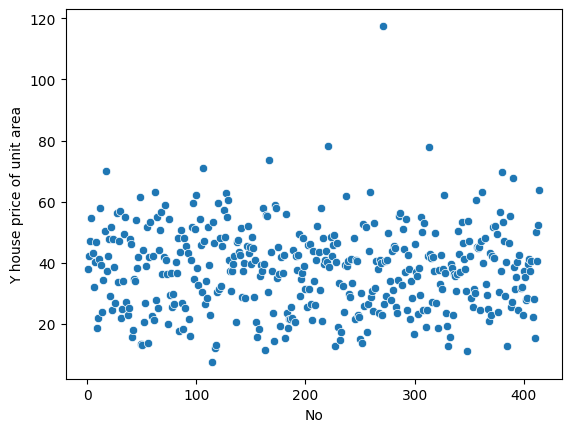

No


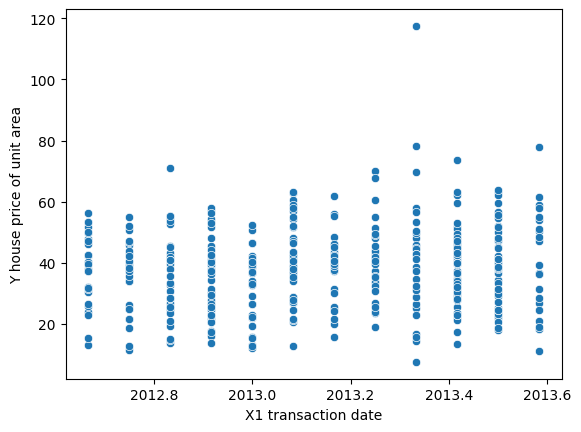

X1 transaction date


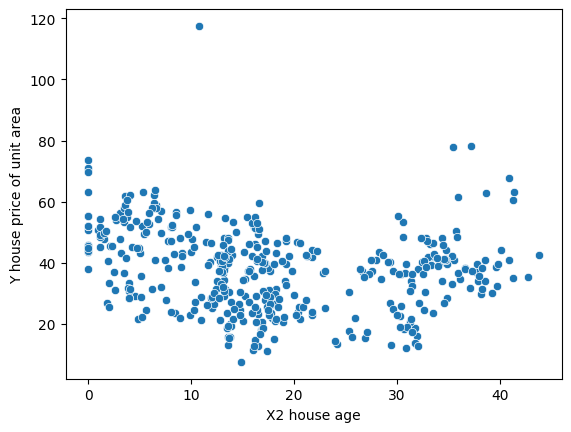

X2 house age


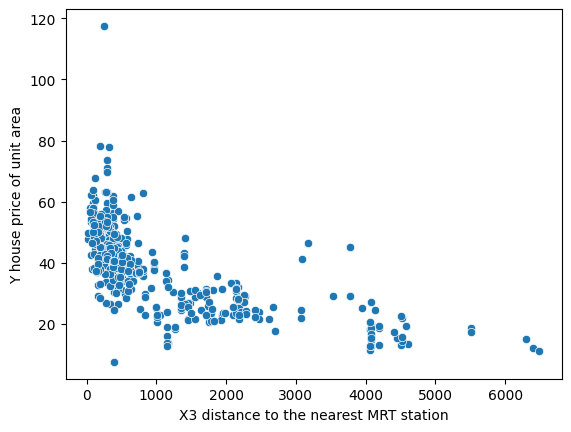

X3 distance to the nearest MRT station


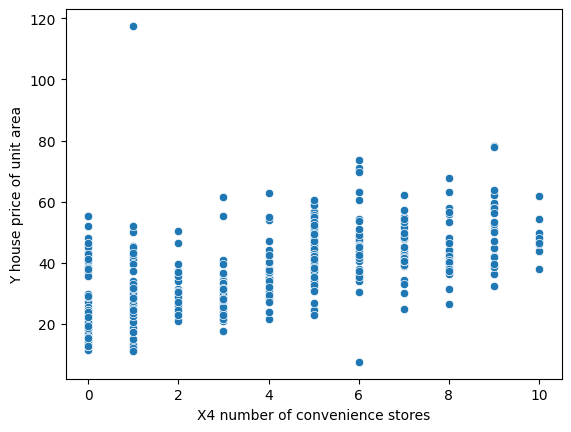

X4 number of convenience stores


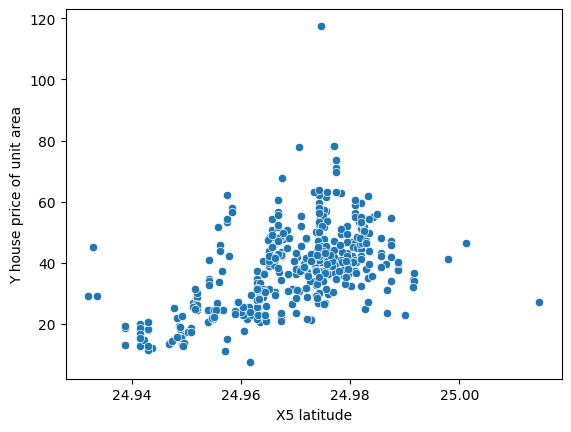

X5 latitude


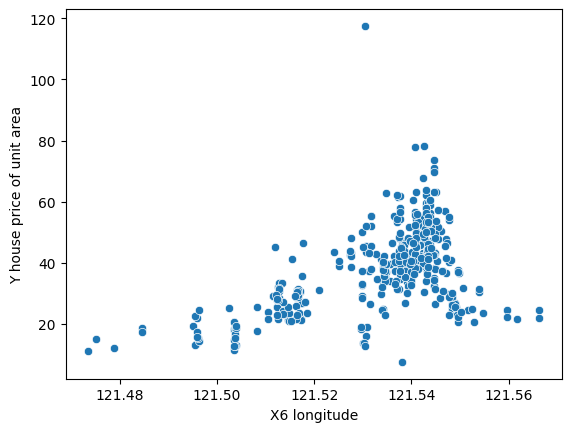

X6 longitude


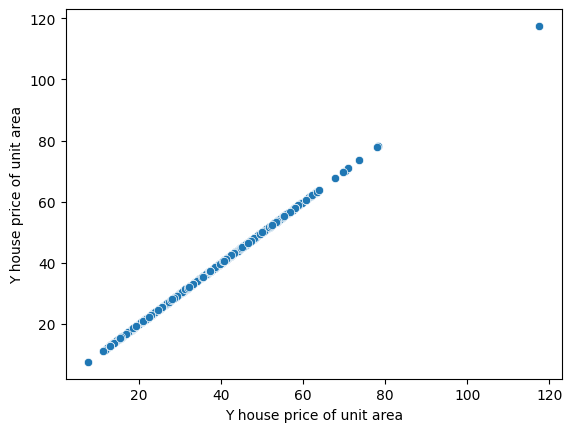

Y house price of unit area


In [21]:
for column in house_data.columns:
    sns.scatterplot(data=house_data, x=column, y="Y house price of unit area")
    plt.show()
    print(column)

In [22]:
# pip install matplotlib
# pip install seaborn - 0.12.2
# pip install scikit-learn - 1.2.2

In [ ]:
# Model Explanability
# Feature importance
# model.coef_ --- what does this mean
    # params = pd.Series(model.coef_, index=features.columns)
    # params